<a href="https://colab.research.google.com/github/smagara/LangGraph-Coursework/blob/main/langgraph_calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠️ LangGraph course assignment 1:
  - Create a LangGraph where you pass in a list of integers along with a name and an Operation (* or +)
  - Add or multiply the elements in the main node
  - Example:
   - Input: {"name": "homer simpson", "values": [1,2,3,5], "operation: "+"
   - Output: "Hi homer simpson, your answer is 11."


In [35]:
## Installs
%pip install -U langgraph

In [36]:
## Setup imports
from langgraph.graph import StateGraph
from typing import TypedDict, List
from IPython.display import display, Image

In [65]:
## Setup execution state object definition
class AgentState(TypedDict):
  name: str
  values: List[int]
  operation: str
  call_num: int ## track our number of calls
  result: str

In [66]:
## Helper function for multiplication
def my_mult(values: List[int]) -> int:
    """Multiplies the elements of a list of integers."""
    result = 1
    for val in values:
        result *= val
    return result

In [88]:
## setup our main calculator node
def CalculatorNode(state: AgentState) -> AgentState:
  """This node takes in an array of integers and calculates the sum or product of the values"""
  print("CalculatorNode is called")
  state["call_num"] += 1
  if state["operation"] == "*":
    answer = str(my_mult(state["values"]))
  elif state["operation"] == "+":
    answer = str(sum(state["values"]))
  else:
    answer = "INVALID OPERATION:" + state["operation"]
  state["result"] = f"Hi there {state['name']}! Your answer is {answer}"
  return state

In [89]:
## setup our LangGraph flow
graph = StateGraph(AgentState)
graph.add_node(CalculatorNode, "CalculatorNode")
graph.set_finish_point("CalculatorNode")
graph.set_entry_point("CalculatorNode")
app = graph.compile()

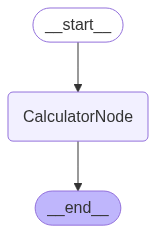

In [69]:
display(Image(app.get_graph().draw_mermaid_png()))

In [81]:
## run add!
# Provide initial state dictionary matching AgentState structure
out = app.invoke({"name" : "homer simpson", "values" : [1,2,3,5], "operation" : "+", "call_num" : 0, "result": ""})
print(out) # The output will be the final state dictionary

CalculatorNode is called
{'name': 'homer simpson', 'values': [1, 2, 3, 5], 'operation': '+', 'call_num': 1, 'result': 'Hi there homer simpson! Your answer is 11'}


In [82]:
## run multiply
# Provide initial state dictionary matching AgentState structure
out = app.invoke({"name" : "homer simpson", "values" : [1,2,3,5], "operation" : "*", "call_num" : 0, "result": ""})
print(out) # The output will be the final state dictionary

CalculatorNode is called
{'name': 'homer simpson', 'values': [1, 2, 3, 5], 'operation': '*', 'call_num': 1, 'result': 'Hi there homer simpson! Your answer is 30'}


In [90]:
## run invalid operator!
# Provide initial state dictionary matching AgentState structure
out = app.invoke({"name" : "homer simpson", "values" : [1,2,3,5], "operation" : "/", "call_num" : 0, "result": ""})
print(out) # The output will be the final state dictionary

CalculatorNode is called
{'name': 'homer simpson', 'values': [1, 2, 3, 5], 'operation': '/', 'call_num': 1, 'result': 'Hi there homer simpson! Your answer is INVALID OPERATION:/'}
